In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating the data manually
data_dict = {
    'Species': [
        'Acer platanoides', 'Platanus Hybrida', 'Symphoricarpos albus',
        'Philadelphus coronarius', 'Spiraea chamaedryfolia'
    ],
    '[leaf chlorophyl] Eq. 1': [201.48, 114.61, 176.27, 168.34, 291.01],
    '[leaf chlorophyl] Eq. 2': [510.44, 345.82, 464.70, 450.03, 664.40],
    '[leaf chlorophyl] Eq. 3': [479.47, 301.50, 428.39, 412.27, 659.62],
    '[leaf chlorophyl] Eq. 4': [46.02, 28.36, 40.52, 38.86, 68.46],
    '[leaf chlorophyl] Eq. 5': [45.91, 27.29, 40.04, 38.28, 70.33]
}

# Creating the DataFrame
data = pd.DataFrame(data_dict)

In [ ]:
# Extracting chlorophyll values for each equation
eq1 = data['[leaf chlorophyl] Eq. 1']
eq2 = data['[leaf chlorophyl] Eq. 2']
eq3 = data['[leaf chlorophyl] Eq. 3']
eq4 = data['[leaf chlorophyl] Eq. 4']
eq5 = data['[leaf chlorophyl] Eq. 5']

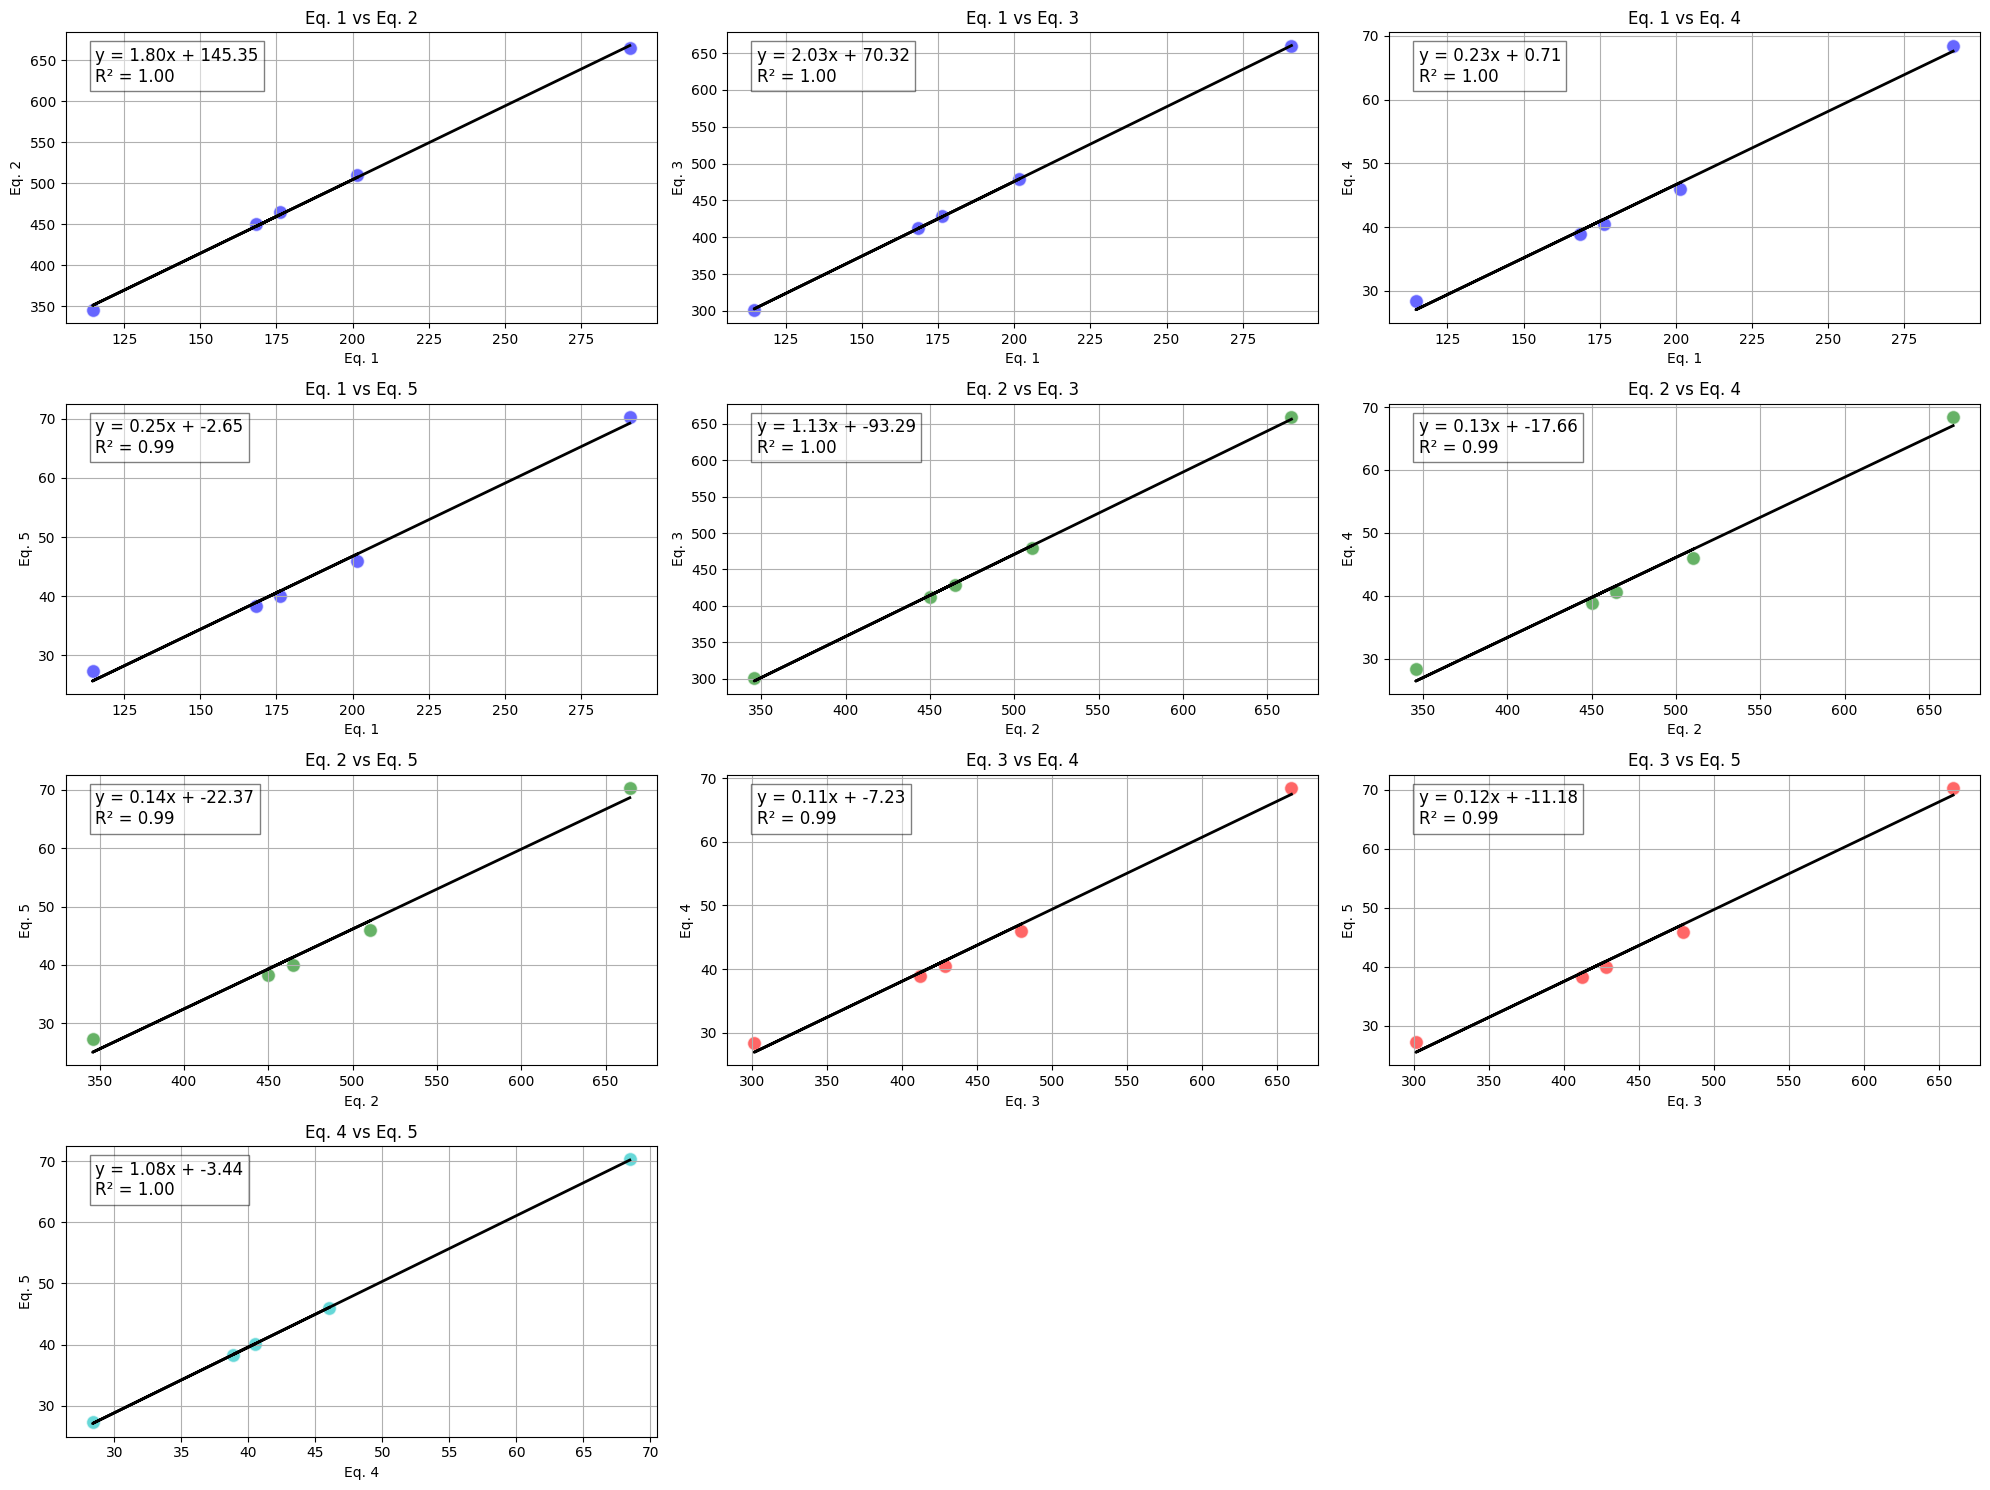

In [ ]:
# Plotting the chlorophyll values against each other
plt.figure(figsize=(20, 15))

equations = [eq1, eq2, eq3, eq4, eq5]
eq_labels = ['Eq. 1', 'Eq. 2', 'Eq. 3', 'Eq. 4', 'Eq. 5']
colors = ['b', 'g', 'r', 'c', 'm']

plot_number = 1

for i in range(len(equations)):
    for j in range(i + 1, len(equations)):
        X = equations[i].values.reshape(-1, 1)
        y = equations[j].values

        # Linear regression
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        r2 = model.score(X, y)
        slope = model.coef_[0]
        intercept = model.intercept_

        # Plot
        plt.subplot(4, 3, plot_number)
        plt.scatter(equations[i], equations[j], color=colors[i], alpha=0.6, edgecolors='w', s=100)
        plt.plot(equations[i], y_pred, color='k', linewidth=2)
        plt.xlabel(eq_labels[i])
        plt.ylabel(eq_labels[j])
        plt.title(f'{eq_labels[i]} vs {eq_labels[j]}')
        plt.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.2f}',
                 transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
        plt.grid(True)

        plot_number += 1

plt.tight_layout()
plt.savefig('all_plots.png')
plt.show()
